In [2]:
%cd /Users/user/Desktop/IWF-DNN/data2DComplex
%pwd
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import scipy.io as sio
import time
import keras
from sklearn.cross_validation import train_test_split
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

/Users/user/Desktop/IWF-DNN/data2DComplex


Using TensorFlow backend.
/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
DateLocation='MIMO100000_3.mat'
Data = sio.loadmat(DateLocation)#load data
Xdata=Data['X']
Ydata=Data['Y']
Xdata = np.transpose(Xdata)
Ydata = np.transpose(Ydata)
X = np.column_stack((np.real(Xdata), np.imag(Xdata)))
Y = np.column_stack((np.real(Ydata), np.imag(Ydata)))
x_train, x_val ,y_train, y_val= train_test_split(X, Y, test_size=0.1)
DateLocation2='MIMO5000_3.mat'
DataTest10000 = sio.loadmat(DateLocation2)#load data
Xtest=DataTest10000['X']
Xtest = np.transpose(Xtest)
Ytest=DataTest10000['Y']
Ytest = np.transpose(Ytest)
Xtest = np.column_stack((np.real(Xtest), np.imag(Xtest)))
Ytest = np.column_stack((np.real(Ytest), np.imag(Ytest)))

In [4]:
dictData={}

In [5]:
def plot_whole(dict_data):
    fig_1 = plt.figure(figsize=(16,5))
    ax_1 = fig_1.add_subplot(1,2,1)
    ax_2 = fig_1.add_subplot(1,2,2)
    k =int(0)
    for data in dict_data.values():
        ax_1.plot(np.arange(0,len(data['loss'])),data['loss'], label=list(dict_data.keys())[k])
        ax_2.plot(np.arange(0,len(data['val_loss'])),data['val_loss'], label=list(dict_data.keys())[k])
        k += 1
    ax_1.legend(loc=0)
    
    ax_2.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('error(train)')
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('error(valid)')
    fig_1.savefig('err.pdf')
    return fig_1, ax_1, ax_2


In [11]:

model4layers = Sequential()
# activation=keras.layers.ReLU()
model4layers.add(Dense(480, input_dim=24, activation='relu'))
model4layers.add(Dense(360, activation='relu'))
model4layers.add(Dense(240, activation='relu'))
model4layers.add(Dense(120, activation='relu'))
model4layers.add(Dense(60, activation='relu'))
model4layers.add(Dense(24, activation='linear'))
model4layers.summary()
adam=keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999)
model4layers.compile(loss='mse', optimizer=adam)
hist=model4layers.fit(x_train, y_train,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencod')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-360-240-120-60']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 480)               12000     
_________________________________________________________________
dense_14 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_15 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_16 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_17 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_18 (Dense)             (None, 24)                1464      
Total params: 309,444
Trainable params: 309,444
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 140/200
90000/90000 [==============================] - 16s 179us/step - loss: 0.0243 - val_loss: 0.1784
Epoch 141/200
90000/90000 [==============================] - 16s 178us/step - loss: 0.0245 - val_loss: 0.1752
Epoch 142/200
90000/90000 [==============================] - 16s 178us/step - loss: 0.0246 - val_loss: 0.1802
Epoch 143/200
90000/90000 [==============================] - 18s 205us/step - loss: 0.0243 - val_loss: 0.1767
Epoch 144/200
90000/90000 [==============================] - 17s 189us/step - loss: 0.0240 - val_loss: 0.1759
Epoch 145/200
90000/90000 [==============================] - 17s 192us/step - loss: 0.0237 - val_loss: 0.1786
Epoch 146/200
90000/90000 [==============================] - 17s 188us/step - loss: 0.0237 - val_loss: 0.1791
Epoch 147/200
90000/90000 [==============================] - 17s 193us/step - loss: 0.0236 - val_loss: 0.1756
Epoch 148/200
90000/90000 [==============================] - 17s 191us/step - loss: 0.0237 - val_loss: 0.1792
Epoch 149/

(<Figure size 1152x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a286e90b8>)

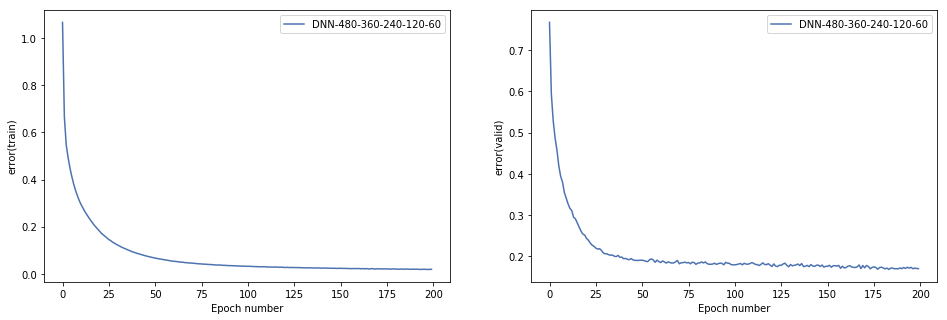

In [28]:
plot_whole(dictData)

(<Figure size 1152x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a387116d8>)

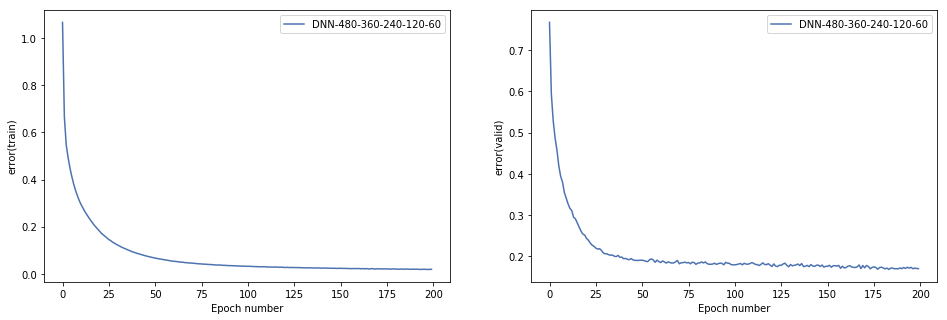

In [27]:
np.savez( "0805ActivateFunction_Results.npz", data=dictData )
d = np.load( "0805ActivateFunction_Results.npz" )
for sturctuers in sorted( d.items() ):
    val = sturctuers[1][()]
plot_whole(val)

# save model

In [23]:
from keras.models import model_from_json
model4layers_json = model4layers.to_json()
with open("model4layers.json", "w") as json_file:
    json_file.write(model4layers_json)
# serialize weights to HDF5
model4layers.save_weights("model4layers.h5")
print("Saved model to disk")
# later...
# load json and create model
json_file = open('model4layers.json', 'r')
loaded_model4layers_json = json_file.read()
json_file.close()

loaded_model4layers = model_from_json(loaded_model4layers_json)
# load weights into new model
loaded_model4layers.load_weights("model4layers.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model4layers.compile(loss='mse', optimizer=adam)
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Saved model to disk
Loaded model from disk


In [21]:
# serialize model to JSON
from keras.models import model_from_json
model_json = model4layers.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model4layers.save_weights("model.h5")
print("Saved model to disk")
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(Xtest, Ytest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Saved model to disk
Loaded model from disk
acc: 22.17%


In [17]:
import time
def obj_sum_rate(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    sum_rate=[]
    for i in range(samples):
        rate_nn=0
        H=np.reshape(xtest[i,:],[K,M,N])
        pnn=np.reshape(y_pred[i,:],[K,M,N])      
        for j in range(K):
            if j==0:
                rate_nn = rate_nn+np.real(np.log2( \
                                                  np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),np.transpose(pnn[j,:,:])), np.transpose(H[j,:,:])))))
            else:
                pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(), pnn[j,:,:]), np.transpose(H[j,:,:]))) \
                                                  /np.linalg.det((np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),pnn[j-1,:,:]),np.transpose(H[j,:,:]))))))
                
        sum_rate.append(rate_nn)
    return sum_rate

def power(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    powerall=[]
    for i in range(samples):
        power=0
        H=np.reshape(xtest[i,:],[K,M,N])
#         print(y_pred[i,:])
        pnn=np.reshape(y_pred[i,:],[K,M,N])  
#         print(pnn)
        for j in range(K):
            power=power+np.trace(np.transpose(pnn[j,:,:]))
        powerall.append(np.real(power))
    return powerall

def DABtoComplex(XX, dim):
    size=XX.shape[1]
    X=np.empty( (XX.shape[0], dim), dtype= np.complex128 )
    X.real[:,:]=XX[:,0:dim]
    X.imag[:,:]=XX[:,dim:2*dim]
    return X


def CDF_Plot(sumRate1, sumRate2, label1= 'DNN', label2= 'IWF'):
    a = np.array(sumRate1) # your array of numbers
    num_bins1 = np.linspace(0, max(sumRate1), 50)
    counts1, bin_edges1 = np.histogram(a, bins='auto', normed=True)
    cdf1 = np.cumsum(counts1*np.diff(bin_edges1))

    b = np.array(sumRate2) # your array of numbers
    num_bins2 = np.linspace(0, max(sumRate2), 50)
    counts2, bin_edges2 = np.histogram(b, bins='auto', normed=True)
    cdf2 = np.cumsum(counts2*np.diff(bin_edges2))
    
    plt.xlabel('sum-rate')
    plt.plot(bin_edges1[1:], cdf1, color='black', label=label1)
    plt.plot(bin_edges2[1:],cdf2,color='red', label=label2)
    plt.legend()
    return 0

def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),50)
    plt.hist(data, bins, alpha=0.7, label=label)
#     plt.legend(loc='upper right')
    plt.xlim([0, 15])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.legend()
    plt.show()
    return 0
def performance(sumRate1,sumRate2, num):
# sumRate1, IWF; sumRate2, NN
    print('Sum-rate: IWF: %0.3f, DNN: %0.3f'%(sum(sumRate1)/num, sum(sumRate2)/num))
    print('Ratio: DNN: %0.3f%%\n' % (sum(sumRate2) / sum(sumRate1)* 100))
    return 0

def testPerformance(model, Xtest,x_train,x_val,y_train,y_val,Ytest,dim, M, N, K,samples):
    ypred=model.predict(Xtest)
    trainPred=model.predict(x_train)
    valPred=model.predict(x_val)
    
    x=DABtoComplex(X,dim)
    xtest=DABtoComplex(Xtest,dim)
    ytest=DABtoComplex(Ytest,dim)
    ypred=DABtoComplex(ypred,dim)

    # train & val
    xtrain=DABtoComplex(x_train,dim)
    ytrain=DABtoComplex(y_train,dim)
    trainPred=DABtoComplex(trainPred,dim)
    xval=DABtoComplex(x_val,dim)
    yval=DABtoComplex(y_val,dim)
    valPred=DABtoComplex(valPred,dim)

    # test
    nnsumRate=obj_sum_rate(xtest, ypred, M, N, K, samples)
    IWFsumRate=obj_sum_rate(xtest, ytest, M, N, K, samples)
    #trian
    nnSRTrain=obj_sum_rate(xtrain, trainPred, M, N, K, samples)
    IWFSRTrain=obj_sum_rate(xtrain, ytrain, M, N, K, samples)
    # validation
    IWFSRVal=obj_sum_rate(xval, yval, M, N, K, samples)
    nnSRVal=obj_sum_rate(xval, valPred, M, N, K, samples)

    plt.figure(1)
    plt.subplot(311)
    plt.title('CDF AnalysisTest')
    CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
    plt.subplot(312)
    plt.title('CDF Analysis_Train')
    CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
    plt.subplot(313)
    plt.title('CDF Analysis_val')
    CDF_Plot(nnSRVal,IWFSRVal, 'DNNVal', 'IWFVal')
    
    plt.figure(2)
    plt.subplot(211)
    plt.title('Hist AnalysisTest')
    histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
    plt.subplot(212)
    plt.title('Hist Analysis_Train')
    histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
    
    performance(IWFsumRate, nnsumRate, samples)
    performance(IWFSRTrain, nnSRTrain, samples)
    return 0
        

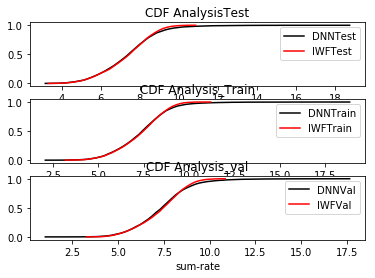

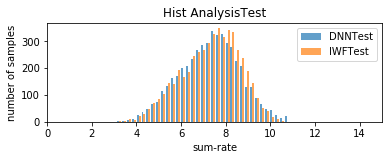

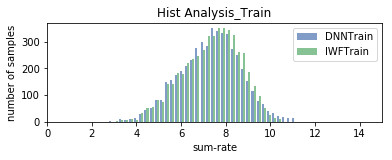

Sum-rate: IWF: 7.326, DNN: 7.389
Ratio: DNN: 100.867%

Sum-rate: IWF: 7.346, DNN: 7.392
Ratio: DNN: 100.632%



0

In [19]:
testPerformance(model4layers, Xtest,x_train,x_val,y_train,y_val,Ytest,12, 2, 2, 3,5000)

In [34]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
model4layers2 = Sequential()
# activation=keras.layers.ReLU()
activation=keras.layers.elu(alpha=0.3)

model4layers2.add(Dense(480, input_dim=24, activation=activation))
model4layers2.add(Dense(360, activation=activation))
model4layers2.add(Dense(240, activation=activation))
model4layers2.add(Dense(120, activation=activation))
model4layers2.add(Dense(60, activation=activation))
model4layers2.add(Dense(24, activation='linear'))
model4layers2.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model4layers2.compile(loss='mse', optimizer=adam)
hist=model4layers2.fit(x_train, y_train,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencod')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-360-240-120-60-elu']=hist.history

/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as ELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 480)               12000     
_________________________________________________________________
dense_20 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_21 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_22 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_23 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_24 (Dense)             (None, 24)                1464      
Total params: 309,444
Trainable params: 309,444
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 140/200
90000/90000 [==============================] - 17s 192us/step - loss: 0.0699 - val_loss: 0.1933
Epoch 141/200
90000/90000 [==============================] - 18s 196us/step - loss: 0.0694 - val_loss: 0.1914
Epoch 142/200
90000/90000 [==============================] - 18s 196us/step - loss: 0.0689 - val_loss: 0.1904
Epoch 143/200
90000/90000 [==============================] - 18s 196us/step - loss: 0.0683 - val_loss: 0.1899
Epoch 144/200
90000/90000 [==============================] - 18s 198us/step - loss: 0.0677 - val_loss: 0.1907
Epoch 145/200
90000/90000 [==============================] - 18s 198us/step - loss: 0.0671 - val_loss: 0.1896
Epoch 146/200
90000/90000 [==============================] - 18s 199us/step - loss: 0.0669 - val_loss: 0.1896
Epoch 147/200
90000/90000 [==============================] - 18s 199us/step - loss: 0.0662 - val_loss: 0.1897
Epoch 148/200
90000/90000 [==============================] - 18s 202us/step - loss: 0.0657 - val_loss: 0.1912
Epoch 149/

(<Figure size 1152x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a366d8390>)

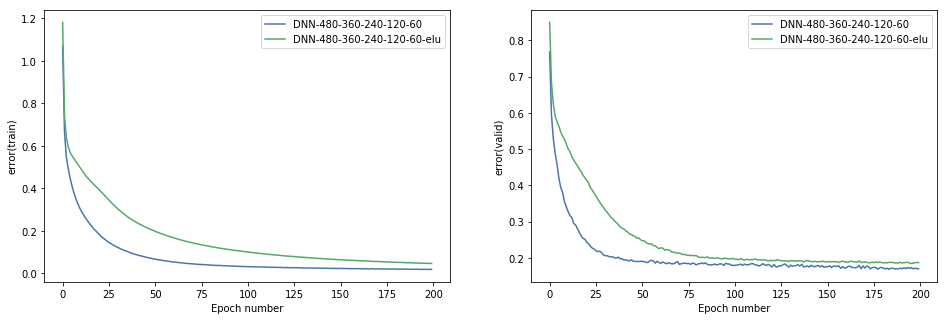

In [36]:
plot_whole(dictData)

In [41]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
model4layers3 = Sequential()
# activation=keras.layers.ReLU()
# keras.activations.elu(x, alpha=1.0)
activation=keras.layers.LeakyReLU(alpha=0.3)

model4layers3.add(Dense(480, input_dim=24))
model4layers3.add(activation)
model4layers3.add(Dense(360))
model4layers3.add(activation)
model4layers3.add(Dense(240))
model4layers3.add(activation)
model4layers3.add(Dense(120))
model4layers3.add(activation)
model4layers3.add(Dense(60))
model4layers3.add(activation)
model4layers3.add(Dense(24, activation='linear'))
model4layers3.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model4layers3.compile(loss='mse', optimizer=adam)
hist=model4layers3.fit(x_train, y_train,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencod')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-360-240-120-60-LeakyRelu']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 480)               12000     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    multiple                  0         
_________________________________________________________________
dense_33 (Dense)             (None, 360)               173160    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    multiple                  0         
_________________________________________________________________
dense_34 (Dense)             (None, 240)               86640     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    multiple                  0         
_________________________________________________________________
dense_35 (Dense)             (None, 120)               28920     
__________

Epoch 134/200
90000/90000 [==============================] - 14s 152us/step - loss: 0.0601 - val_loss: 0.1771
Epoch 135/200
90000/90000 [==============================] - 14s 152us/step - loss: 0.0594 - val_loss: 0.1755
Epoch 136/200
90000/90000 [==============================] - 14s 152us/step - loss: 0.0595 - val_loss: 0.1723
Epoch 137/200
90000/90000 [==============================] - 14s 153us/step - loss: 0.0583 - val_loss: 0.1776
Epoch 138/200
90000/90000 [==============================] - 14s 150us/step - loss: 0.0581 - val_loss: 0.1761
Epoch 139/200
90000/90000 [==============================] - 14s 151us/step - loss: 0.0587 - val_loss: 0.1735
Epoch 140/200
90000/90000 [==============================] - 14s 151us/step - loss: 0.0574 - val_loss: 0.1757
Epoch 141/200
90000/90000 [==============================] - 14s 153us/step - loss: 0.0570 - val_loss: 0.1838
Epoch 142/200
90000/90000 [==============================] - 14s 151us/step - loss: 0.0568 - val_loss: 0.1776
Epoch 143/

(<Figure size 1152x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a33b84e48>)

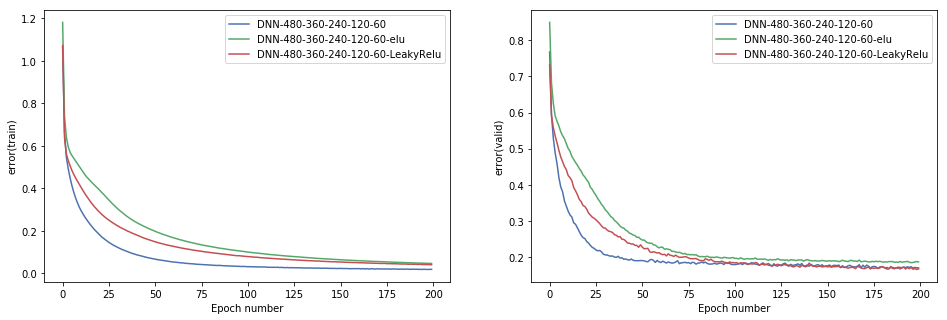

In [42]:
plot_whole(dictData)

In [53]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
model4layers5 = Sequential()
# activation=keras.layers.ReLU()
# keras.activations.elu(x, alpha=1.0)
# activation=keras.layers.LeakyReLU(alpha=0.3)

model4layers5.add(Dense(480, input_dim=24, activation='linear'))
model4layers5.add(Dense(360, activation='linear'))
model4layers5.add(Dense(240, activation='linear'))
model4layers5.add(Dense(120, activation='linear'))
model4layers5.add(Dense(60, activation='linear'))
model4layers5.add(Dense(24, activation='linear'))
model4layers5.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model4layers5.compile(loss='mse', optimizer=adam)
hist=model4layers5.fit(x_train, y_train,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencod')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-360-240-120-60-linear']=hist.history


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 480)               12000     
_________________________________________________________________
dense_43 (Dense)             (None, 360)               173160    
_________________________________________________________________
dense_44 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_45 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_46 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_47 (Dense)             (None, 24)                1464      
Total params: 309,444
Trainable params: 309,444
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 140/200
90000/90000 [==============================] - 12s 137us/step - loss: 1.3149 - val_loss: 1.3180
Epoch 141/200
90000/90000 [==============================] - 12s 138us/step - loss: 1.3149 - val_loss: 1.3181
Epoch 142/200
90000/90000 [==============================] - 12s 138us/step - loss: 1.3149 - val_loss: 1.3182
Epoch 143/200
90000/90000 [==============================] - 12s 138us/step - loss: 1.3149 - val_loss: 1.3181
Epoch 144/200
90000/90000 [==============================] - 12s 138us/step - loss: 1.3149 - val_loss: 1.3179
Epoch 145/200
90000/90000 [==============================] - 12s 138us/step - loss: 1.3149 - val_loss: 1.3185
Epoch 146/200
90000/90000 [==============================] - 12s 138us/step - loss: 1.3149 - val_loss: 1.3180
Epoch 147/200
90000/90000 [==============================] - 12s 138us/step - loss: 1.3149 - val_loss: 1.3180
Epoch 148/200
90000/90000 [==============================] - 12s 138us/step - loss: 1.3149 - val_loss: 1.3179
Epoch 149/

(<Figure size 1152x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a372b8320>)

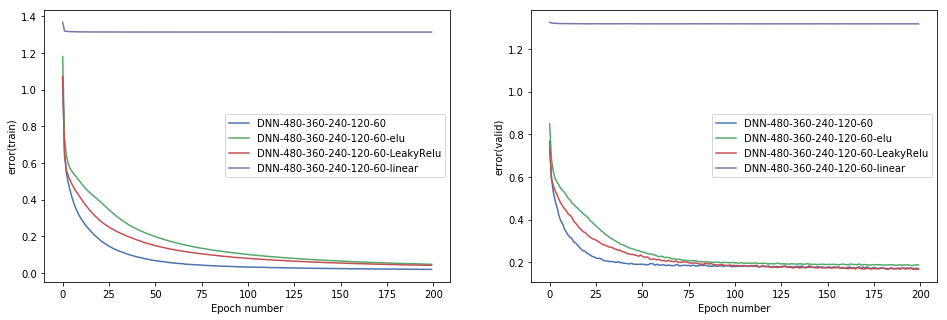

In [54]:
plot_whole(dictData)

In [26]:
val['DNN-FiveHiddens-tanh']=dictData['DNN-FiveHiddens-tanh']

In [27]:
val.keys()

dict_keys(['DNN-480-360-240-120-60', 'DNN-480-360-240-120-60-elu', 'DNN-480-360-240-120-60-LeakyRelu', 'DNN-480-360-240-120-60-linear', 'DNN-FiveHiddens-tanh'])

(<Figure size 1152x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a316b48d0>)

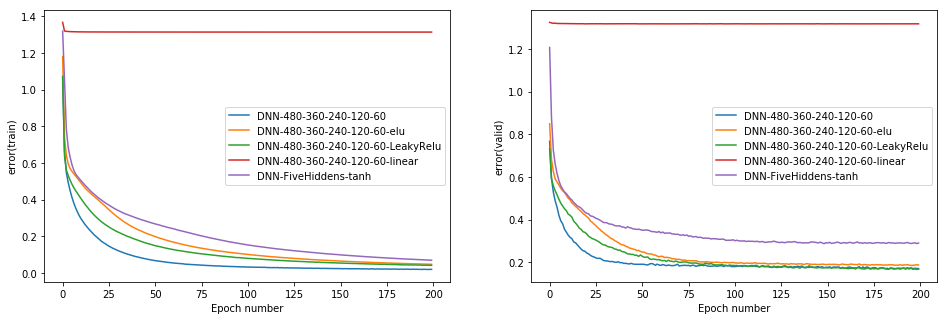

In [28]:
np.savez( "0805ActivateFunction_Results.npz", data= val )
d = np.load( "0805ActivateFunction_Results.npz" )
for sturctuers in sorted( d.items() ):
    val = sturctuers[1][()]
plot_whole(val)

In [15]:
dictData={}

In [16]:
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
model4layers2 = Sequential()
# activation=keras.layers.ReLU()
activation='tanh'

model4layers2.add(Dense(480, input_dim=24, activation=activation))
model4layers2.add(Dense(360, activation=activation))
model4layers2.add(Dense(240, activation=activation))
model4layers2.add(Dense(120, activation=activation))
model4layers2.add(Dense(60, activation=activation))
model4layers2.add(Dense(24, activation='linear'))
model4layers2.summary()
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model4layers2.compile(loss='mse', optimizer=adam)
hist=model4layers2.fit(x_train, y_train,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencod')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-FiveHiddens-tanh']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 480)               12000     
_________________________________________________________________
dense_8 (Dense)              (None, 360)               173160    
_________________________________________________________________
dense_9 (Dense)              (None, 240)               86640     
_________________________________________________________________
dense_10 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_11 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_12 (Dense)             (None, 24)                1464      
Total params: 309,444
Trainable params: 309,444
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 140/200
90000/90000 [==============================] - 27s 304us/step - loss: 0.1073 - val_loss: 0.2909
Epoch 141/200
90000/90000 [==============================] - 30s 330us/step - loss: 0.1063 - val_loss: 0.2911
Epoch 142/200
90000/90000 [==============================] - 26s 290us/step - loss: 0.1056 - val_loss: 0.2956
Epoch 143/200
90000/90000 [==============================] - 26s 290us/step - loss: 0.1045 - val_loss: 0.2947
Epoch 144/200
90000/90000 [==============================] - 29s 321us/step - loss: 0.1038 - val_loss: 0.2940
Epoch 145/200
90000/90000 [==============================] - 25s 278us/step - loss: 0.1031 - val_loss: 0.2921
Epoch 146/200
90000/90000 [==============================] - 23s 253us/step - loss: 0.1020 - val_loss: 0.2904
Epoch 147/200
90000/90000 [==============================] - 22s 240us/step - loss: 0.1014 - val_loss: 0.2942
Epoch 148/200
90000/90000 [==============================] - 22s 242us/step - loss: 0.1007 - val_loss: 0.2909
Epoch 149/

(<Figure size 1152x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a25e7b240>)

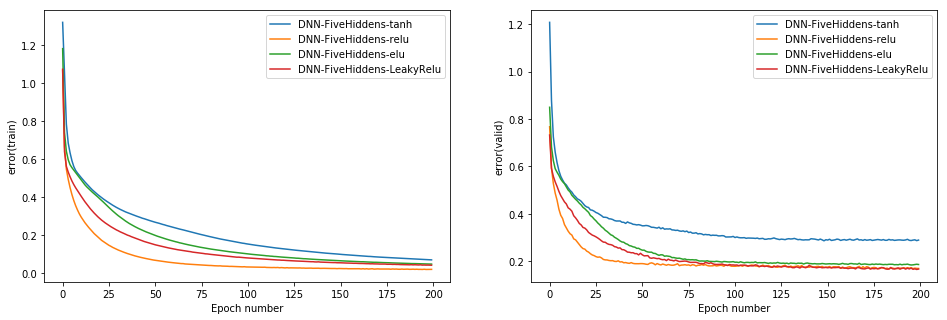

In [19]:
dictData2={}
dictData2['DNN-FiveHiddens-tanh']=dictData['DNN-FiveHiddens-tanh']
dictData2['DNN-FiveHiddens-relu']=val['DNN-480-360-240-120-60']
dictData2['DNN-FiveHiddens-elu']=val['DNN-480-360-240-120-60-elu']
dictData2['DNN-FiveHiddens-LeakyRelu']=val['DNN-480-360-240-120-60-LeakyRelu']

plot_whole(dictData2)

(<Figure size 1152x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a259cb908>)

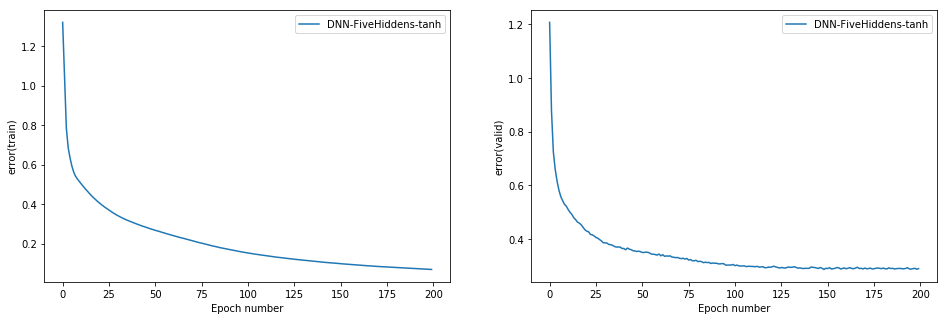

In [17]:
plot_whole(dictData)